In [1]:
import chart_tools as ct

# ct.load_data('help', 'football')
# s = ct.DataSource("datasets", "football-datasets", "master", "datasets")
# s2 = ct.DataSource("ryayoung", "datasets", "main")

# s.req_url
# s.datasets


In [3]:
df

,Id,OverallCond,MSZoning,LotArea,LandContour,LotConfig,LandSlope,BldgType,HouseStyle,OverallQual,...,FireplaceQu,GarageType,GarageCars,GarageArea,WoodDeckSF,ScreenPorch,Pool,YrSold,SaleCondition,SalePrice
0,1,5,RL,8450,Lvl,Inside,Gtl,1Fam,2Story,7,...,NaN,Attchd,2,548,0,0,1,2008,Normal,208500
1,2,8,RL,9600,Lvl,FR2,Gtl,1Fam,1Story,6,...,TA,Attchd,2,460,298,0,1,2007,Normal,181500
2,3,5,RL,11250,Lvl,Inside,Gtl,1Fam,2Story,7,...,TA,Attchd,2,608,0,0,1,2008,Normal,223500
3,4,5,RL,9550,Lvl,Corner,Gtl,1Fam,2Story,7,...,Gd,Detchd,3,642,0,0,1,2006,Other,140000
4,5,5,RL,14260,Lvl,FR2,Gtl,1Fam,2Story,8,...,TA,Attchd,3,836,192,0,1,2008,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,5,RL,7917,Lvl,Inside,Gtl,1Fam,2Story,6,...,TA,Attchd,2,460,0,0,1,2007,Normal,175000
1456,1457,6,RL,13175,Lvl,Inside,Gtl,1Fam,1Story,6,...,TA,Attchd,2,500,349,0,1,2010,Normal,210000
1457,1458,9,RL,9042,Lvl,Inside,Gtl,1Fam,2Story,7,...,Gd,Attchd,1,252,0,0,1,2010,Normal,266500
1458,1459,6,RL,9717,Lvl,Inside,Gtl,1Fam,1Story,5,...,NaN,Attchd,1,240,366,0,1,2010,Normal,142125


In [ ]:
s.display_datasets()
# s2.load("ames_full").head()

In [14]:
s2.path = ""
print(s2.path)
# s2.datasets
# s2.path = ""
# s2.path
# s2.load("ames_mini")
s2.file_url("ames_full")

'https://raw.githubusercontent.com/ryayoung/datasets/main/ames_full.csv'

In [ ]:
# s.path = s.path + "serie-a"
# s.path
s.datasets

In [6]:
sets = ['data/ames_engineered', 'data/ames_full', 'data/ames_mini', 'data/stock-tweets']

# print([f for f in sets if f.removesuffix('.csv').removeprefix("") == "ames_mini"])

f = 'data/ames_full'
f.removesuffix('.csv').removeprefix("")


'data/ames_full'

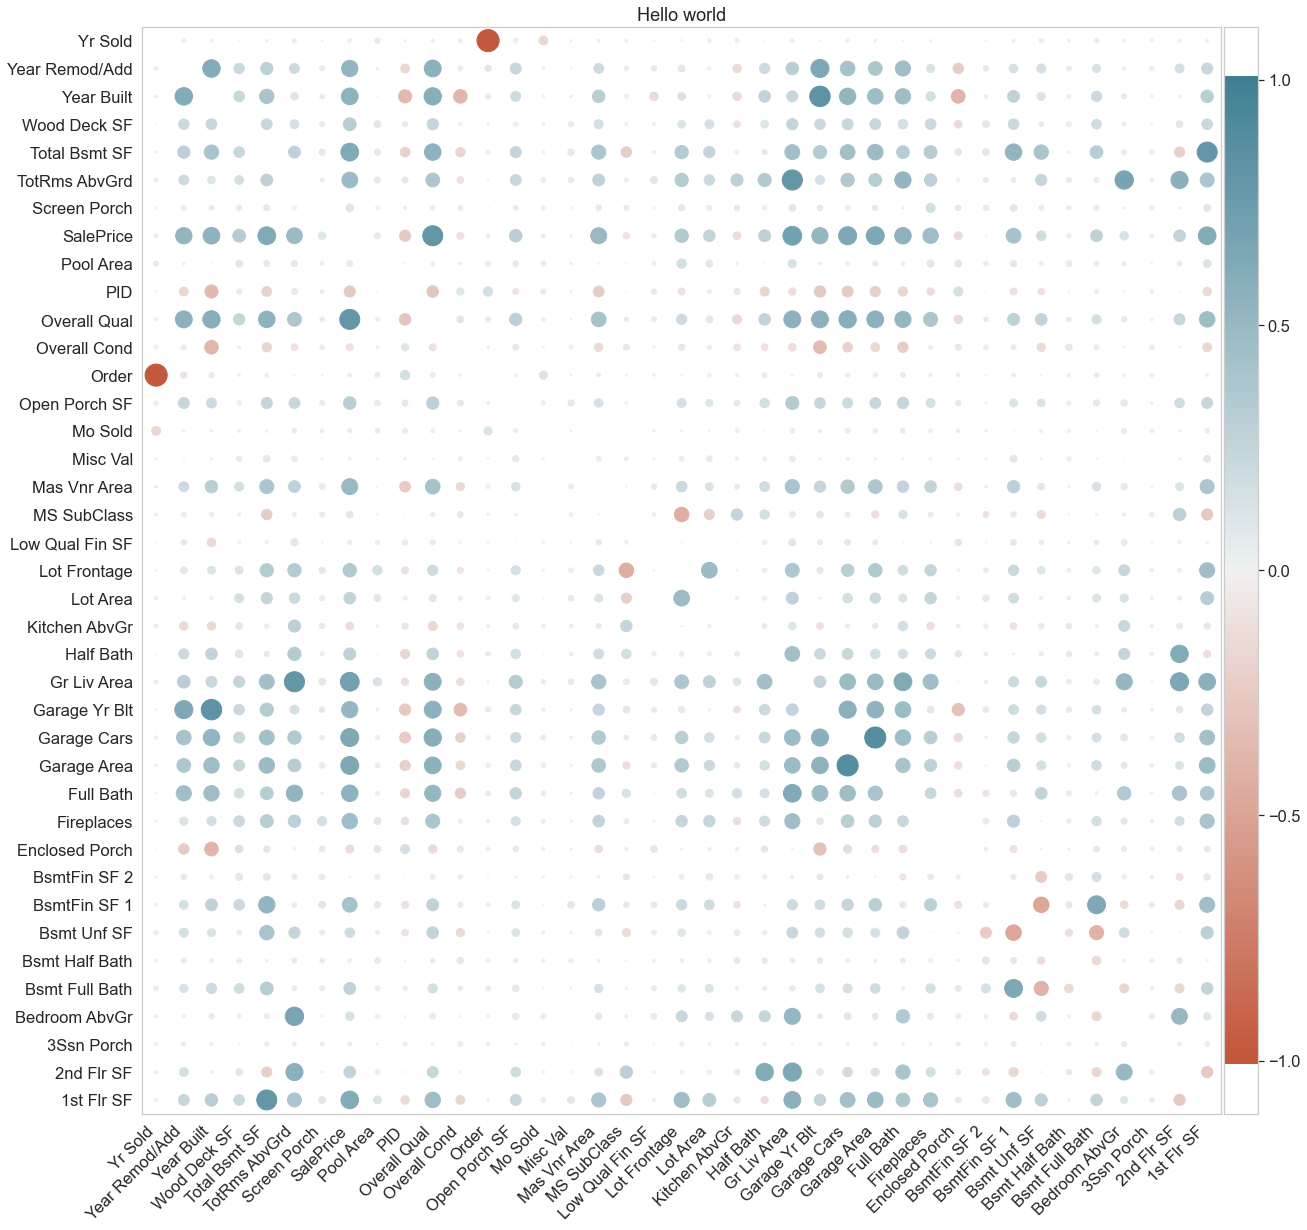

In [4]:
import chart_tools as ct
df = ct.DataSource("ryayoung", "datasets", "main", "data").load("ames_full")
ct.set_style(20)
ct.superheat(df.corr(), threshold=0.0, half_mask=False, self_mask=True, marker='o', grid=False, title="Hello world");

In [27]:
dfc = df.corr()
dfc = dfc.loc[['Order', 'PID', 'MS SubClass'], ['Order', 'PID', 'MS SubClass']]
dfc = dfc.mask(dfc < 0.01).dropna()
dfc
# dfc.loc['Year Built', :]

,Order,PID,MS SubClass
Order,1.0,0.173593,0.011797


In [1]:
import chart_tools as ct
# ct.load_data("ames_mini")
# df_raw = ct.load_data("ames_mini")[['OverallCond', 'LotArea', 'OverallQual', 'GarageCars', 'SalePrice', 'YrSold', 'SaleCondition', 'SaleCondition', 'HouseStyle', 'Foundation']]
df_raw = ct.load_data("ames_mini")[['OverallCond', 'LotArea', 'OverallQual', 'GarageCars', 'SalePrice', 'YrSold']]
df_raw

,OverallCond,LotArea,OverallQual,GarageCars,SalePrice,YrSold
0,5,8450,7,2,208500,2008
1,8,9600,6,2,181500,2007
2,5,11250,7,2,223500,2008
3,5,9550,7,3,140000,2006
4,5,14260,8,3,250000,2008
...,...,...,...,...,...,...
1455,5,7917,6,2,175000,2007
1456,6,13175,6,2,210000,2010
1457,9,9042,7,1,266500,2010
1458,6,9717,5,1,142125,2010


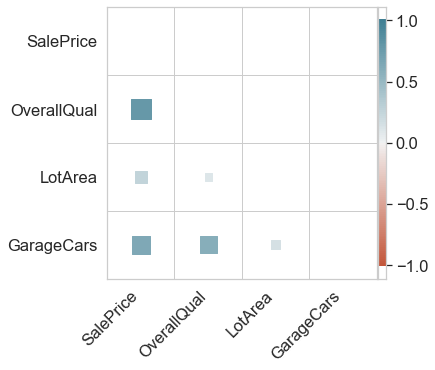

In [6]:
import pandas as pd
import seaborn as sns
df = df_raw.copy()

def sig_corr(corr:pd.DataFrame, threshold:float) -> pd.DataFrame:
    assert len(corr.columns) == len(corr.index), "A correlation df needs the same length columns and index"
    df = corr.copy()
    df['mean'] = df.mean(axis=1)
    to_drop = set()
    for var in df.index:
        if abs(df.loc[var, 'mean']) < threshold:
            to_drop.add(var)
    df = df.drop(index=to_drop, columns=to_drop)
    df = df.drop(columns='mean')
    return df


ct.set_style(5)
ct.superheat(df.corr(), thresh_avg=0.2);

In [1]:
import chart_tools as ct
import pandas as pd

# ct.load_data("help")
# s = ct.DataSource("ryayoung", "datasets", "main", "data")
# s.subdirs
# s.display_datasets(header=False)

ct.load_data('ames_full')
# s = ct.DataSource(name='openml')
# print(s.path)
# print(s.datasets)
# s.load("ames_full")
# sources = ct.get_sources()
# ct.display_sources(sources)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [8]:
ct.load_data("openml", "gina_prior2")

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3464,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
3465,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3466,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8


In [7]:
s.display_datasets()

Datasets for 'openml':
---------------------------
  yeast/
    yeast
  cmc/
    cmc
  gina_prior2/
    gina_prior2
  ionosphere/
    ionosphere
  fbis.wc/
    fbis.wc
  wdbc/
    wdbc
  profb/
    profb
  spambase/
    spambase
  breast-w/
    breast-w
  jm1/
    jm1
  liver-disorders/
    liver-disorders
  gina_agnostic/
    gina_agnostic
  satimage/
    satimage
  wall-robot-navigation/
    wall-robot-navigation
  gas-drift/
    gas-drift
  vehicle/
    vehicle
  soybean/
    soybean
  vote/
    vote
  breast-cancer/
    breast-cancer
  hill-valley/
    hill-valley
  banknote-authentication/
    banknote-authentication
  one-hundred-plants-shape/
    one-hundred-plants-shape
  mfeat-karhunen/
    mfeat-karhunen
  bank-marketing/
    bank-marketing
  musk/
    musk
  qsar-biodeg/
    qsar-biodeg
  glass/
    glass
  lung-cancer/
    lung-cancer
  heart-statlog/
    heart-statlog
  haberman/
    haberman
  kr-vs-kp/
    kr-vs-kp
  kc2/
    kc2
  pc1/
    pc1
  Satellite/
    Satellite

In [6]:
s.truncated_datasets

False

In [2]:
ct.DataSource.sources

{'main': DataSource(_Source__user='ryayoung', _Source__repo='datasets', _Source__branch='main', _Source__path='data'),
 'covid': DataSource(_Source__user='datasets', _Source__repo='covid-19', _Source__branch='main', _Source__path='data'),
 'football': DataSource(_Source__user='datasets', _Source__repo='football-datasets', _Source__branch='master', _Source__path='datasets'),
 'sp500': DataSource(_Source__user='datasets', _Source__repo='s-and-p-500-companies', _Source__branch='master', _Source__path='data')}

In [7]:
for k in ct.DataSource.sources.keys():
    print(ct.DataSource.sources[k].datasets)

['ames_engineered', 'ames_full', 'ames_mini', 'stock-tweets']
['countries-aggregated', 'key-countries-pivoted', 'reference', 'time-series-19-covid-combined', 'us_confirmed', 'us_deaths', 'us_simplified', 'worldwide-aggregate']
['bundesliga/season-0809', 'bundesliga/season-0910', 'bundesliga/season-1011', 'bundesliga/season-1112', 'bundesliga/season-1213', 'bundesliga/season-1314', 'bundesliga/season-1415', 'bundesliga/season-1516', 'bundesliga/season-1617', 'bundesliga/season-1718', 'bundesliga/season-1819', 'la-liga/season-0809', 'la-liga/season-0910', 'la-liga/season-1011', 'la-liga/season-1112', 'la-liga/season-1213', 'la-liga/season-1314', 'la-liga/season-1415', 'la-liga/season-1516', 'la-liga/season-1617', 'la-liga/season-1718', 'la-liga/season-1819', 'ligue-1/season-0910', 'ligue-1/season-1011', 'ligue-1/season-1112', 'ligue-1/season-1213', 'ligue-1/season-1314', 'ligue-1/season-1415', 'ligue-1/season-1516', 'ligue-1/season-1617', 'ligue-1/season-1718', 'ligue-1/season-1819', 'pr

ModuleNotFoundError: No module named 'sample'